In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import chart_studio
chart_studio.tools.set_credentials_file(username='rkdtmdrn210', api_key='hz8WwlUJWOI7esi0ff43')
import plotly.express as px
import cufflinks as cf
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
cf.go_offline(connected=True)

지역별주택매매가격지수 = pd.read_csv('../../[Dacon]/data/부동산시각화/지역별주택매매가격지수(KOSIS).csv', encoding='cp949')
지역별주택전세가격지수 = pd.read_csv('../../[Dacon]/data/부동산시각화/지역별주택전세가격지수(KOSIS).csv', encoding='cp949')
주택매매가격지수 = pd.read_csv('../../[Dacon]/data/부동산시각화/주택매매가격지수(KB).csv')
주택전세가격지수 = pd.read_csv('../../[Dacon]/data/부동산시각화/주택전세가격지수(KB).csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../[Dacon]/data/부동산시각화/지역별주택매매가격지수(KOSIS).csv'

## 주택 전세,매매 가격지수란?

특정시점 가격을 기준으로 상승 하락정도를 쉽게 알 수 있도록 측정한 지수

In [37]:
주택전세가격지수.head()

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040


In [38]:
지역별주택매매가격지수.head()

,주택유형별,도단위,권역단위,시단위,구단위,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04
0,종합,전국,소계,소계,소계,105.3,106.3,107.1,108.1,108.9,109.6
1,종합,수도권,소계,소계,소계,110.1,110.8,111.7,113.0,114.1,115.1
2,종합,지방,소계,소계,소계,101.2,102.3,103.1,103.8,104.3,104.9
3,종합,6대광역시,소계,소계,소계,106.1,107.7,108.9,110.0,111.0,111.9
4,종합,5대광역시,소계,소계,소계,105.7,107.6,108.8,109.9,110.8,111.5


In [39]:
# 시계열데이터 처리를 용이하게 하기 위해 시계열 컬럼 인덱스로 변환

주택매매가격지수['Unnamed: 0'] = pd.to_datetime(주택매매가격지수['Unnamed: 0'])
주택매매가격지수.set_index('Unnamed: 0', inplace=True)

주택전세가격지수['Unnamed: 0'] = pd.to_datetime(주택전세가격지수['Unnamed: 0'])
주택전세가격지수.set_index('Unnamed: 0', inplace=True)
주택전세가격지수.head()

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
Unnamed: 0,,,,,,
1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040


In [41]:
주택매매가격지수2 = 주택매매가격지수['2019-01-01':'2021-05-01']
주택전세가격지수2 = 주택전세가격지수['2019-01-01':'2021-05-01']

매매_평균 = 주택매매가격지수2.mean().reset_index()
전세_평균 = 주택전세가격지수2.mean().reset_index()


trace1 = go.Bar(x=매매_평균["index"], y=매매_평균[0], name='매매')
trace2 = go.Bar(x=전세_평균["index"], y=전세_평균[0], name='전세')

data = [trace1, trace2]
layout = go.Layout(title='주택유형별 매매지수비교 2015~2021년')
fig = go.Figure(data=data, layout=layout)
fig.iplot()

- 19년 1월을 기준으로 지금까지 약 2년간 평균적으로 단독,연립주택 아파트까지 모든 주택의 전세,매매가격지수가 상승했다.
- 특히 서울지역의 아파트 매매가격지수가 105를 초과한 모습을 확인 할 수 있다.

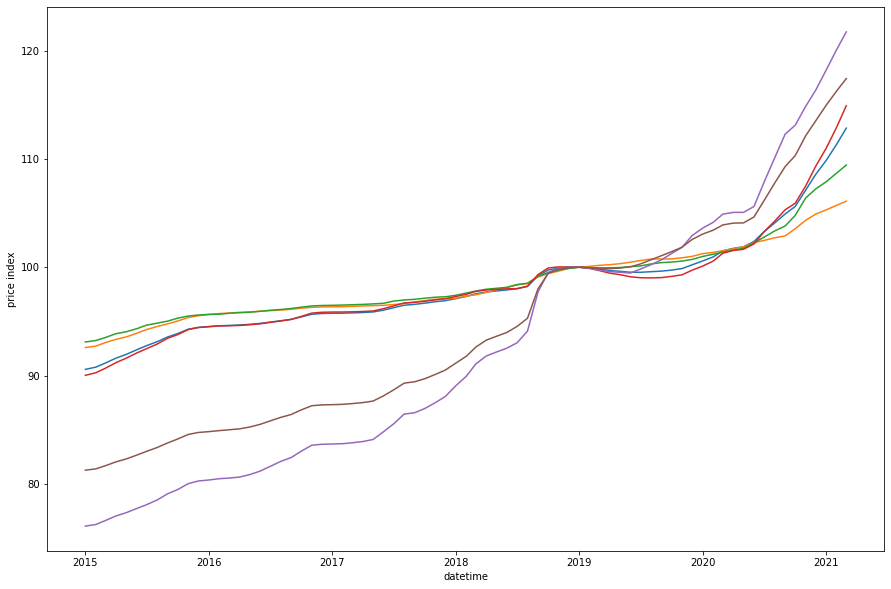

In [42]:
주택매매가격지수3 = 주택매매가격지수['2015-01-01':'2021-05-01']
주택전세가격지수3 = 주택전세가격지수['2015-01-01':'2021-05-01']

plt.figure(figsize=(15, 10))
for i in 주택매매가격지수.columns:
    sns.lineplot(data=주택매매가격지수3, x=주택매매가격지수3.index, y=주택매매가격지수3[i])
plt.xlabel('datetime')
plt.ylabel('price index')
plt.show()

- 2018년~2019년에 가파른 상승세가 짧게 존재한다.
- 2020년~2020년까지 비교적 기울기가 완만한 구간이 존재한다.
- 2020년 중반부터 현재까지 주택유형에 관계없이 급격한 상향세를 보인다.

In [44]:
지역별매매평균 = 지역별주택매매가격지수.mean().reset_index()
지역별전세평균 = 지역별주택전세가격지수.mean().reset_index()

trace3 = go.Scatter(x=지역별매매평균['index'], y=지역별매매평균[0], mode='lines', name ='매매')
trace4 = go.Scatter(x=지역별전세평균['index'], y=지역별전세평균[0], mode='lines', name ='전세')
data2 = [trace3, trace4]
layout2 = go.Layout(title='최근 6개월 전지역 평균 전세, 매매지수 변화')
fig2 = go.Figure(data=data2, layout=layout2)
fig2.iplot()

- 보다 세부적으로 최근 6개월을 살펴봐도 전세, 매매지수는 꾸준히 상승하고 있다.
- 2020년 12월부터 미세하게 상승세가 감소했다.

In [46]:
도단위매매평균 = 지역별주택매매가격지수.groupby(by='도단위').mean().reset_index()
도단위전세평균 = 지역별주택전세가격지수.groupby(by='도단위').mean().reset_index()

trace5 = go.Bar(x=도단위매매평균["도단위"], y=도단위매매평균["2021. 04"], name='매매')
trace6 = go.Bar(x=도단위전세평균["도단위"], y=도단위전세평균["2021. 04"], name='전세')

data3 = [trace5, trace6]
layout3 = go.Layout(title='전체지역 21년 4월 전세,매매지수 비교')
fig3 = go.Figure(data=data3, layout=layout3)
fig3.iplot()

- 2021년 4월 기준 세종,경기와 서울,대전,대구등에서 높은 전세,매매지수를 보여주고있다. 
- 세종의 경우 전세지수가 매매지수에 비해 크게 높은 특이점을 가지고 있다.
- 지방의 경우 위에 언급한 주요 지역보다 상승치가 크지않거나 오히려 하락한곳도 존재한다.

In [48]:
fig4 = px.scatter(data_frame=지역별주택매매가격지수, x=지역별주택매매가격지수['2021. 04'], 
                  y=지역별주택전세가격지수['2021. 04'], color='도단위', title='매매지수 상위 5개지역 21년 4월 전세,매매지수 산포도' )
fig4.iplot()

- 경기 일부지역을 제외한 대부분의 지역에서 매매지수가 상승한 모습을 보여주며 특히 세종, 대전,경기가 매우 높은 매매지수를 보여준다.
- 대전,경기는 대부분의 지역에서 전세지수에 비해 매매지수가 뚜렷하게 크다.
- 세종의 경우 전세수치가 다른지역에 비해 뚜렷하게 높은 특징이 있다.